In [1]:
import scipy as sci
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

In [2]:
df = pd.read_csv("solar.csv")
df.head()

,Catalog Number,Calendar Date,Eclipse Time,Delta T (s),Lunation Number,Saros Number,Eclipse Type,Gamma,Eclipse Magnitude,Latitude,Longitude,Sun Altitude,Sun Azimuth,Path Width (km),Central Duration
0,1,-1999 June 12,03:14:51,46438,-49456,5,T,-0.2701,1.0733,6.0N,33.3W,74,344,247,06m37s
1,2,-1999 December 5,23:45:23,46426,-49450,10,A,-0.2317,0.9382,32.9S,10.8E,76,21,236,06m44s
2,3,-1998 June 1,18:09:16,46415,-49444,15,T,0.4994,1.0284,46.2N,83.4E,60,151,111,02m15s
3,4,-1998 November 25,05:57:03,46403,-49438,20,A,-0.9045,0.9806,67.8S,143.8W,25,74,162,01m14s
4,5,-1997 April 22,13:19:56,46393,-49433,-13,P,-1.4670,0.1611,60.6S,106.4W,0,281,NaN,NaN


In [20]:
df['Normalized Latitude'] = ""
df.loc[df["Latitude"].str[-1] == "N", 'Normalized Latitude'] = df["Latitude"].str[0:-1]
df.loc[df["Latitude"].str[-1] == "S", 'Normalized Latitude'] = "-" + df["Latitude"].str[0:-1]

df['Normalized Longitude'] = ""
df.loc[df["Longitude"].str[-1] == "E", 'Normalized Longitude'] = df["Longitude"].str[0:-1]
df.loc[df["Longitude"].str[-1] == "W", 'Normalized Longitude'] = "-" + df["Longitude"].str[0:-1]

df.head()

,Catalog Number,Calendar Date,Eclipse Time,Delta T (s),Lunation Number,Saros Number,Eclipse Type,Gamma,Eclipse Magnitude,Latitude,Longitude,Sun Altitude,Sun Azimuth,Path Width (km),Central Duration,Normalized Latitude,Normalized Longitude
0,1,-1999 June 12,03:14:51,46438,-49456,5,T,-0.2701,1.0733,6.0N,33.3W,74,344,247,06m37s,6.0,-33.3
1,2,-1999 December 5,23:45:23,46426,-49450,10,A,-0.2317,0.9382,32.9S,10.8E,76,21,236,06m44s,-32.9,10.8
2,3,-1998 June 1,18:09:16,46415,-49444,15,T,0.4994,1.0284,46.2N,83.4E,60,151,111,02m15s,46.2,83.4
3,4,-1998 November 25,05:57:03,46403,-49438,20,A,-0.9045,0.9806,67.8S,143.8W,25,74,162,01m14s,-67.8,-143.8
4,5,-1997 April 22,13:19:56,46393,-49433,-13,P,-1.4670,0.1611,60.6S,106.4W,0,281,NaN,NaN,-60.6,-106.4


In [4]:
# This cell calculates solar eclipse counts for each lat/long cell of the world in 15by15 degree squares

# Lat goes from -90 to 90 in groups of 15
# Long goes from -180 to 180 in groups of 15

rows, cols = (12, 24)
solar_matrix = [[0 for i in range(cols)] for j in range(rows)]

for i in range(len(df)):     
    row = int((float(df.loc[i, "Normalized Latitude"]) + 90) / 15)
    col = int((float(df.loc[i, "Normalized Longitude"]) + 180) / 15)
    
    if (row == 12):
        row -= 1
    if (col == 24):
        col -= 1
    
    solar_matrix[row][col] += 1
    
formatted_solar_matrix = [["" for i in range(cols)] for j in range(rows)]

for row in range(rows):
    for col in range(cols):
        term = str(solar_matrix[row][col])
        if len(term) == 1:
            formatted_solar_matrix[row][col] = "  " + term
        elif len(term) == 2:
            formatted_solar_matrix[row][col] = " " + term
        else:
            formatted_solar_matrix[row][col] = term
            
with open('solar_matrix.txt', 'w') as testfile:
    for row in formatted_solar_matrix:
        testfile.write(' '.join([str(a) for a in row]) + '\n')
            
    

(array([832., 559., 537., 547., 557., 397., 404., 355., 376., 359., 277.,
        285., 206., 177.,  88.]),
 array([  0. ,  54.8, 109.6, 164.4, 219.2, 274. , 328.8, 383.6, 438.4,
        493.2, 548. , 602.8, 657.6, 712.4, 767.2, 822. ]),
 <BarContainer object of 15 artists>)

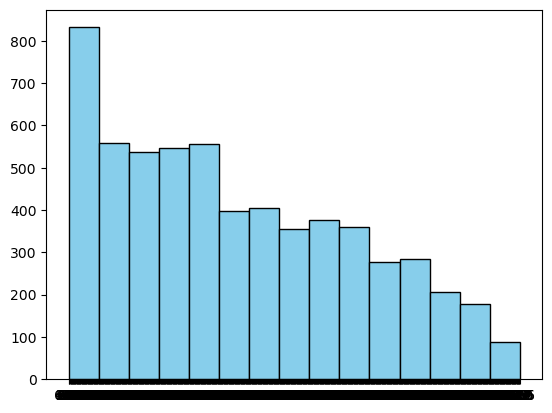

In [18]:
res = []
for i in range(len(df)):
    lat = df.loc[i, "Latitude"]
    if "N" in lat:
        res.append(lat[0:-1])
        
plt.hist(res, bins=15, color='skyblue', edgecolor='black')

In [6]:
# This cell calculates United States total solar eclipse counts for each quadrant of the country
# Columns 0123 correspond to top left, top right, bottom left, and bottom right quadrants respectively
# Rows 0123 correspond to Partial, Annular, Total, and Hybrid solar eclipses respectively

# Lat goes from 25 to 37.5 to 50
# Long goes from -70 to -97.5 to -125

rows, cols = (4, 4)
us_solar_matrix = [[0 for i in range(cols)] for j in range(rows)]

def e_type_ref(s):
    if "P" in s or "p" in s:
        return 0
    elif "A" in s:
        return 1
    elif "T" in s:
        return 2
    elif "H" in s:
        return 3

for i in range(len(df)):     
    lat = float(df.loc[i, "Normalized Latitude"])
    long = float(df.loc[i, "Normalized Longitude"])
    e_type = df.loc[i, "Eclipse Type"]
    col_index = -1
            
    if lat >= 25 and lat <= 37.5: # Bottom Half
        if long >= -125 and long <= -97.5: # Left Half
            col_index = 2
        elif long > -97.5 and long <= -70: # Right Half
            col_index = 3
    elif lat > 37.5 and lat <= 50: # Top Half
        if long >= -125 and long <= -97.5: # Left Half
            col_index = 0
        elif long > -97.5 and long <= -70: # Right Half
            col_index = 1
            
    if col_index != -1:
        us_solar_matrix[e_type_ref(e_type)][col_index] += 1
            
    
    
formatted_us_solar_matrix = [["" for i in range(cols)] for j in range(rows)]

for row in range(rows):
    for col in range(cols):
        term = str(us_solar_matrix[row][col])
        if len(term) == 1:
            formatted_us_solar_matrix[row][col] = "  " + term
        elif len(term) == 2:
            formatted_us_solar_matrix[row][col] = " " + term
        else:
            formatted_us_solar_matrix[row][col] = term
            
with open('us_solar_matrix.txt', 'w') as testfile:
    for row in formatted_us_solar_matrix:
        testfile.write(' '.join([str(a) for a in row]) + '\n')

In [7]:
sci.stats.chi2_contingency(solar_matrix)

Chi2ContingencyResult(statistic=242.7011594369883, pvalue=0.6680225019352933, dof=253, expected_freq=array([[  5.98377879,   5.92284418,   6.33719953,   6.09346109,
          5.91065725,   5.75222727,   5.99596571,   6.03252648,
          6.1543957 ,   5.97159186,   6.09346109,   6.34938645,
          5.83753572,   6.08127416,   5.74004034,   5.94721802,
          6.22751723,   6.11783493,   6.21533031,   6.03252648,
          6.21533031,   5.69129265,   6.0447134 ,   6.25189107],
       [104.20028576, 103.13918306, 110.35468146, 106.11027063,
        102.92696251, 100.16809548, 104.4125063 , 105.04916793,
        107.17137334, 103.98806522, 106.11027063, 110.566902  ,
        101.65363927, 105.89805009,  99.95587494, 103.56362414,
        108.44469659, 106.53471172, 108.23247605, 105.04916793,
        108.23247605,  99.10699277, 105.26138847, 108.86913767],
       [ 24.05891747,  23.81391831,  25.47991259,  24.49991595,
         23.76491847,  23.12792066,  24.1079173 ,  24.25491679,
 

In [8]:
# This cell performs a one way anova with each set of latitude counts
sci.stats.f_oneway(solar_matrix[0], solar_matrix[1], solar_matrix[2], 
                   solar_matrix[3], solar_matrix[4], solar_matrix[5], 
                   solar_matrix[6], solar_matrix[7], solar_matrix[8],
                   solar_matrix[9], solar_matrix[10], solar_matrix[11])

F_onewayResult(statistic=706.7665019914394, pvalue=5.294355553665398e-195)

In [9]:
# Ignore the first row because there are no records for US partial solar eclipses
sci.stats.chi2_contingency(us_solar_matrix[1:])

Chi2ContingencyResult(statistic=2.912160158180919, pvalue=0.8197882008167738, dof=6, expected_freq=array([[24.77142857, 23.31428571, 24.77142857, 29.14285714],
       [23.8       , 22.4       , 23.8       , 28.        ],
       [ 2.42857143,  2.28571429,  2.42857143,  2.85714286]]))

In [10]:
# This cell performs a 2 sample t test to compare the mean 
# path width for northern hemisphere and southern hemisphere eclipses


north_path_width = []
south_path_width = []
east_path_width = []
west_path_width = []

for i in range(len(df)):        
    lat = float(df.loc[i, "Normalized Latitude"])
    path_width = str(df.loc[i, "Path Width (km)"])
    
    if not path_width.isnumeric():
        continue
        
    path_width = float(path_width)
    
    if lat > 0:
        north_path_width.append(path_width)
    else:
        south_path_width.append(path_width)
        
for i in range(len(df)):        
    long = float(df.loc[i, "Normalized Longitude"])
    path_width = str(df.loc[i, "Path Width (km)"])
    
    if not path_width.isnumeric():
        continue
        
    path_width = float(path_width)
    
    if long > 0:
        east_path_width.append(path_width)
    else:
        west_path_width.append(path_width)

In [11]:
sci.stats.ttest_ind(north_path_width, south_path_width, equal_var=False)

TtestResult(statistic=-1.4853131279917007, pvalue=0.1375028557020733, df=7512.360162009298)

In [12]:
sci.stats.ttest_ind(east_path_width, west_path_width, equal_var=False)

TtestResult(statistic=-0.9520308062835232, pvalue=0.3411120598019106, df=7494.685344087569)

Text(0, 0.5, 'Frequency')

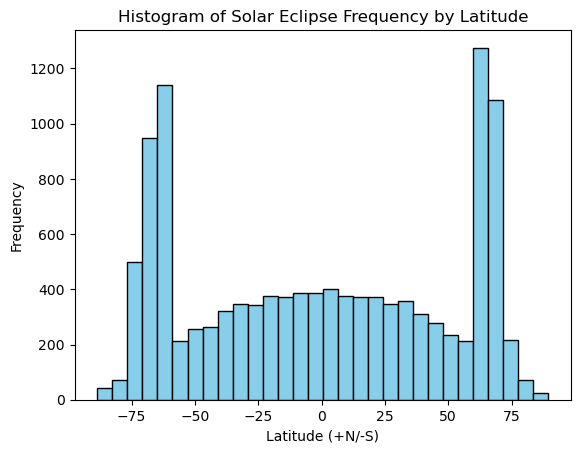

In [19]:
result_lats = []
for i in range(len(df)):     
    la = float(df.loc[i, "Normalized Latitude"])
    result_lats.append(la)
    
plt.hist(result_lats, bins=30, color='skyblue', edgecolor='black')
plt.title("Histogram of Solar Eclipse Frequency by Latitude")
plt.xlabel("Latitude (+N/-S)")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

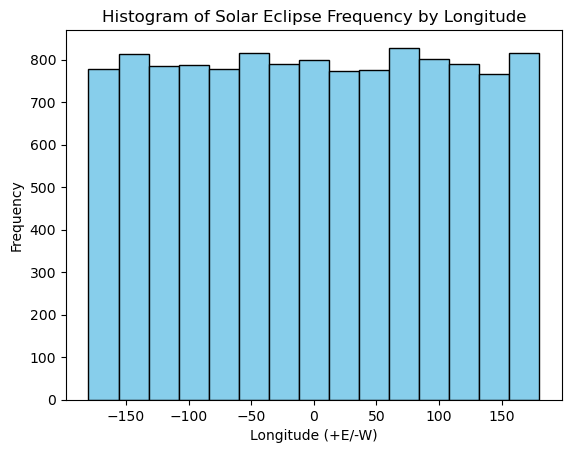

In [14]:
result_longs = []
for i in range(len(df)):     
    lo = float(df.loc[i, "Normalized Longitude"])
    result_longs.append(lo)
    
plt.hist(result_longs, bins=15, color='skyblue', edgecolor='black')
plt.title("Histogram of Solar Eclipse Frequency by Longitude")
plt.xlabel("Longitude (+E/-W)")
plt.ylabel("Frequency")